In [1]:
%load_ext autoreload
import torch
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
import sys
sys.path.append("..")
from pydynmod.snap import SnapShot, ParticleType
import pydynmod.analysesnap

import math

1.2.0.dev20190725+cpu


In [2]:
snap=SnapShot('/Users/wegg/pydynmod/inputmodels/M85_0',omega=1.)
particletype = torch.full((snap.n,),ParticleType.Star,dtype=torch.uint8)
particletype[snap.particletype==0]=ParticleType.DarkMatter
snap.particletype = particletype

In [3]:
barlens = pydynmod.analysesnap.barlen(snap.stars,phaselim=10,fractional_m2=0.2)

[(-10, 10), (-10, 10)]

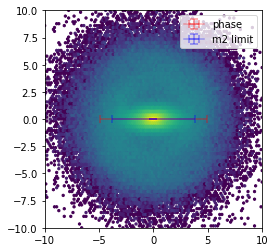

In [4]:
f,ax = plt.subplots(1,1)
ax.hexbin(snap.stars.x,snap.stars.y,C=snap.stars.masses,bins='log',
           extent=(-10,10,-10,10),reduce_C_function=np.sum)
colors=('r','b')
labels=['phase','m2 limit']
for label,color,barlen in zip(labels,colors,barlens):
    ax.errorbar(x=0,y=0,yerr=0,xerr=barlen,color=color,
                capthick=2,capsize=4,elinewidth=2,label=label,alpha=0.3)
plt.legend()
ax.set_aspect('equal', 'box')
ax.set(xlim=(-10, 10), ylim=(-10, 10))

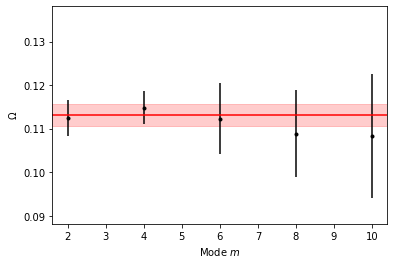

In [5]:
f,ax = plt.subplots(1,1)
omega,omegaerr = pydynmod.analysesnap.patternspeed(snap.stars,plot=ax)